# CNN - CIFAR10 - Data Augmentation

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + 'OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


## Loading the packages

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

Define a function to plot some images from CIFAR and load the dataset.

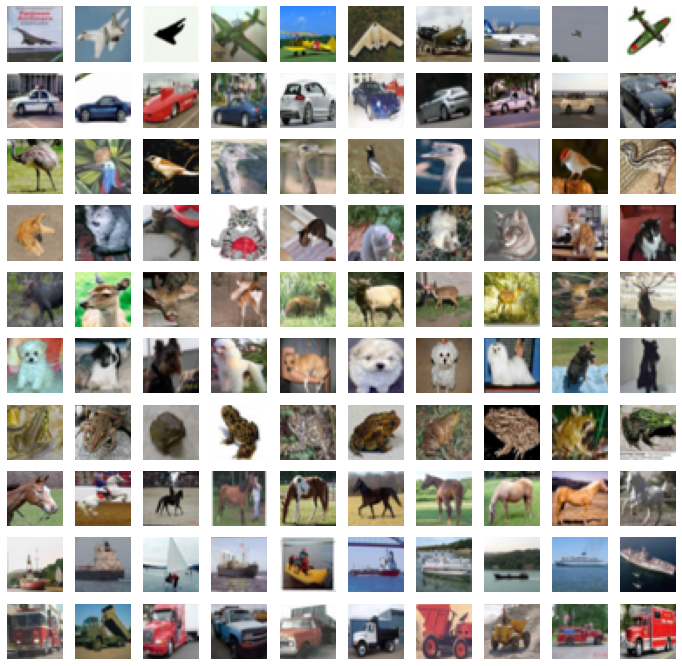

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)


In [3]:
def show_imgs(X,y):
    plt.figure(1, figsize=(12,12))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test, y_test)
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

### Preprocessing data
After loading and splitting the data, we need to preprocess them by reshaping them into the shape the network expects and scaling them so that all values are in the \[0, 1\] interval.

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
the neural network will be a CNN. Follow the structure given in the exercise 1.

In [6]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Conv2D(32, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Flatten())
cnn.add(Dense(n_classes, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

## Compile and train the network

When compiling the model, we need to specify the loss function, the optimizer and the metrics we want to track during the training. In Keras, we need to call the methods `compile()` and `fit()`. We will train through E epochs, using batches of size B, as specified in the exercise 1.

- The `categorical_crossentropy` loss is relevant for multiclass, single-label classification problem. Categorical is used because there are 10 classes to predict from. If there were 2 classes, we would have used `binary_crossentropy`.
- The `adam` optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is defining the update rule for the weights of the neurons during backpropagation gradients.

In [7]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
log = cnn.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.1,
              use_multiprocessing=True)

Epoch 1/10
352/352 [==============================] - 129s 368ms/step - loss: 1.6374 - accuracy: 0.4145 - val_loss: 1.3930 - val_accuracy: 0.5044
Epoch 2/10
352/352 [==============================] - 118s 335ms/step - loss: 1.2775 - accuracy: 0.5517 - val_loss: 1.2029 - val_accuracy: 0.5844
Epoch 3/10
352/352 [==============================] - 130s 368ms/step - loss: 1.1222 - accuracy: 0.6094 - val_loss: 1.0481 - val_accuracy: 0.6424
Epoch 4/10
352/352 [==============================] - 160s 454ms/step - loss: 1.0118 - accuracy: 0.6493 - val_loss: 1.0222 - val_accuracy: 0.6476
Epoch 5/10
352/352 [==============================] - 127s 361ms/step - loss: 0.9347 - accuracy: 0.6770 - val_loss: 0.9366 - val_accuracy: 0.6796
Epoch 6/10
352/352 [==============================] - 134s 381ms/step - loss: 0.8821 - accuracy: 0.6934 - val_loss: 0.9080 - val_accuracy: 0.6922
Epoch 7/10
352/352 [==============================] - 100s 284ms/step - loss: 0.8401 - accuracy: 0.7089 - val_loss: 0.9139 -

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss and accuracy evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

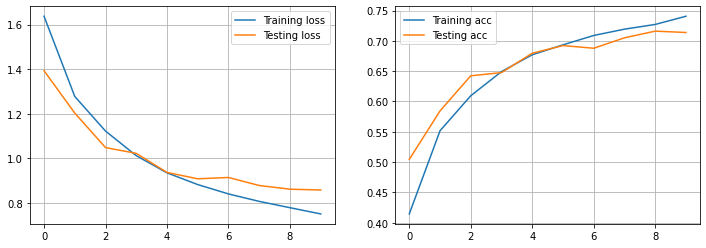

In [8]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [9]:
loss_test, metric_test = cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.8837095499038696
Test accuracy: 0.6934000253677368


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [10]:
pred = cnn.predict_classes(X_test, verbose=0)
confusion_matrix(y_test, pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[678,  20,  58,  26,  63,  14,  10,  12,  64,  55],
       [ 15, 815,   8,   9,  10,  13,   6,   6,  22,  96],
       [ 46,  10, 510,  32, 209,  87,  45,  34,  12,  15],
       [ 11,  11,  83, 440, 119, 218,  53,  36,  16,  13],
       [  8,   2,  28,  42, 777,  43,  27,  55,  12,   6],
       [  4,   2,  44, 122,  91, 664,  12,  41,  12,   8],
       [  4,   3,  43,  62, 105,  46, 724,   6,   4,   3],
       [ 11,   6,  37,  30,  93,  65,   3, 739,   2,  14],
       [ 64,  38,  11,  23,  28,  11,   4,   1, 777,  43],
       [ 22,  74,   9,  15,  17,  16,   5,  10,  22, 810]], dtype=int64)

## Data Augmentation

Overfitting can be caused by having networks with too many parameters that are trained on too few samples. Through training, the model learns *by hart* and generalizes poorly.

**Data augmentation** takes the approach of generating artificially more training data from existing training samples. For images, data augmentation is performed via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will not see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ```ImageDataGenerator``` instance.

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.

In [78]:
cnn_aug = Sequential()
cnn_aug.add(Conv2D(32, kernel_size=(3,3), strides=1, padding='same', activation=None, input_shape=(32, 32, 3)))
cnn_aug.add(Activation("relu"))
cnn_aug.add(Conv2D(32, kernel_size=(3,3), strides=1, padding='same', activation=None))
cnn_aug.add(Activation("relu"))
cnn_aug.add(MaxPooling2D(2))
cnn_aug.add(Conv2D(32, kernel_size=(3,3), strides=1, padding='same', activation=None))
cnn_aug.add(Activation("relu"))
cnn_aug.add(MaxPooling2D(2))
cnn_aug.add(Flatten())
cnn_aug.add(Dense(n_classes, activation='softmax'))

cnn_aug.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 32)       

In [79]:
cnn_aug.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

batches_train = gen.flow(X_train, Y_train, batch_size=128)
batches_test = gen.flow(X_test, Y_test, batch_size=128)

Don't forget to reset your network (by defining it again). You need then to compile the network and train it. The call to the `fit()` function has to be replaced by a call to `fit_generator()` and using the data flow defined above. 

In [81]:
log = cnn_aug.fit(
    batches_train, steps_per_epoch=50000//128,
    epochs=20, validation_data=batches_test, validation_steps=10000//128)

Epoch 1/20
390/390 [==============================] - 128s 328ms/step - loss: 1.6844 - accuracy: 0.3927 - val_loss: 1.4409 - val_accuracy: 0.4792
Epoch 2/20
390/390 [==============================] - 103s 265ms/step - loss: 1.3667 - accuracy: 0.5129 - val_loss: 1.2487 - val_accuracy: 0.5556
Epoch 3/20
390/390 [==============================] - 105s 268ms/step - loss: 1.2056 - accuracy: 0.5748 - val_loss: 1.1433 - val_accuracy: 0.5948
Epoch 4/20
390/390 [==============================] - 112s 288ms/step - loss: 1.1180 - accuracy: 0.6084 - val_loss: 1.0760 - val_accuracy: 0.6216
Epoch 5/20
390/390 [==============================] - 115s 295ms/step - loss: 1.0482 - accuracy: 0.6325 - val_loss: 1.0221 - val_accuracy: 0.6424
Epoch 6/20
390/390 [==============================] - 144s 370ms/step - loss: 0.9972 - accuracy: 0.6514 - val_loss: 0.9833 - val_accuracy: 0.6537
Epoch 7/20
390/390 [==============================] - 163s 419ms/step - loss: 0.9568 - accuracy: 0.6651 - val_loss: 0.9805 -

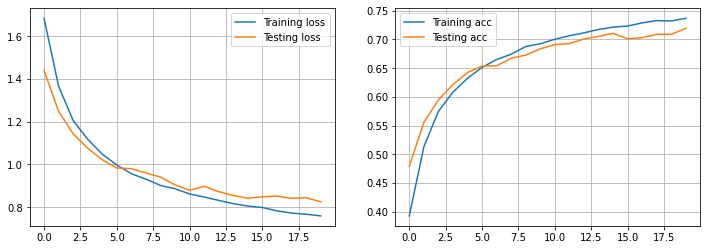

In [82]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [83]:
loss_test, metric_test = cnn_aug.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.7983779907226562
Test accuracy: 0.7336000204086304


### Table of results

Describe your data augmentation strategies here.

| CNN | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  No DA | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-DENSE | 74.1%  | 69.3% |
|  With DA v1 | CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-DENSE | 72.8%  | 71.4 |


# Visualisation of activations

In [163]:
layer_1st_conv_logits = cnn_aug.layers[0].output
logits_model = tf.keras.models.Model(inputs=cnn_aug.input, outputs=layer_1st_conv_logits)

layer_1st_conv_activations = cnn_aug.layers[1].output
activations_model = tf.keras.models.Model(inputs=cnn_aug.input, outputs=layer_1st_conv_activations)

max_pool_activations = cnn_aug.layers[5].output
max_pool_activations_model = tf.keras.models.Model(inputs=cnn_aug.input, outputs=max_pool_activations)

In [278]:
from skimage.transform import rescale

def plot_feature_maps(img):
    rows = 8

    logits = logits_model.predict(img[np.newaxis])
    nr_of_channels = logits.shape[-1]

    fig, axes = plt.subplots(nr_of_channels // rows, rows, figsize=(20, 2 * nr_of_channels // rows))
    fig.suptitle("Logits layer 1", fontsize=16)

    for j in range(nr_of_channels):
        ax = axes[j // rows, j - rows * (j // rows)]
        ax.imshow(img)
        ax.imshow(logits[0, :, :, j], alpha=0.7)

    activations = activations_model.predict(img[np.newaxis])
    nr_of_channels = activations.shape[-1]

    fig, axes = plt.subplots(nr_of_channels // rows, rows, figsize=(20, 2 * nr_of_channels // rows))
    fig.suptitle("Activations layer 1", fontsize=16)

    for j in range(nr_of_channels):
        ax = axes[j // rows, j - rows * (j // rows)]
        ax.imshow(img)
        ax.imshow(activations[0, :, :, j], alpha=0.7)

    activations = max_pool_activations_model.predict(img[np.newaxis])
    nr_of_channels = activations.shape[-1]

    fig, axes = plt.subplots(nr_of_channels // rows, rows, figsize=(20, 2 * nr_of_channels // rows))
    fig.suptitle("Maxpool layer 2", fontsize=16)

    for j in range(nr_of_channels):
        ax = axes[j // rows, j - rows * (j // rows)]
        ax.imshow(rescale(img, (0.5, 0.5, 1)))
        ax.imshow(activations[0, :, :, j], alpha=0.5)

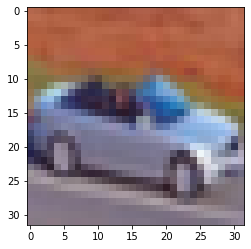

In [162]:
i = np.random.choice(range(60000))
img1 = X_train[i]
plt.imshow(img1)

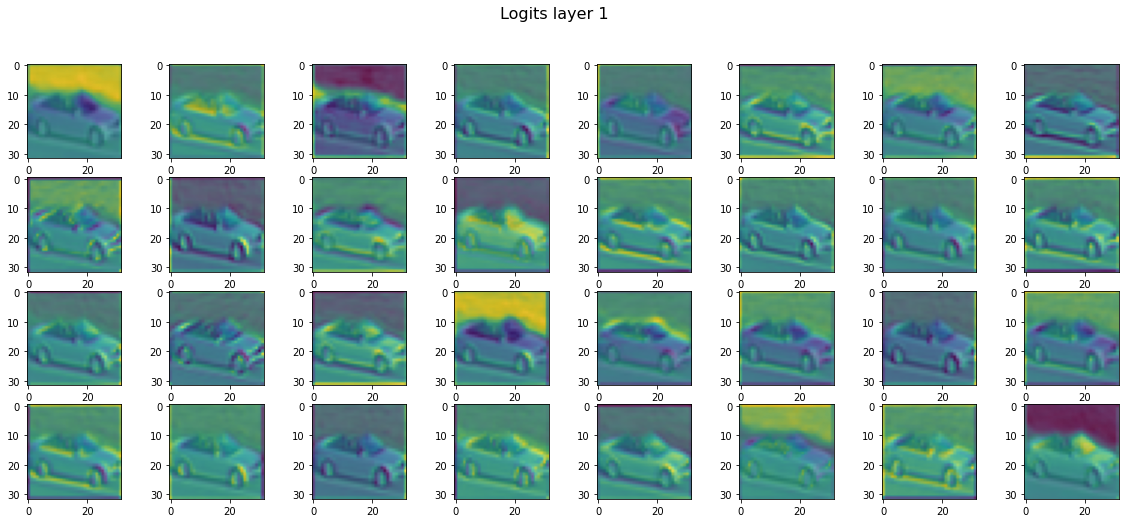

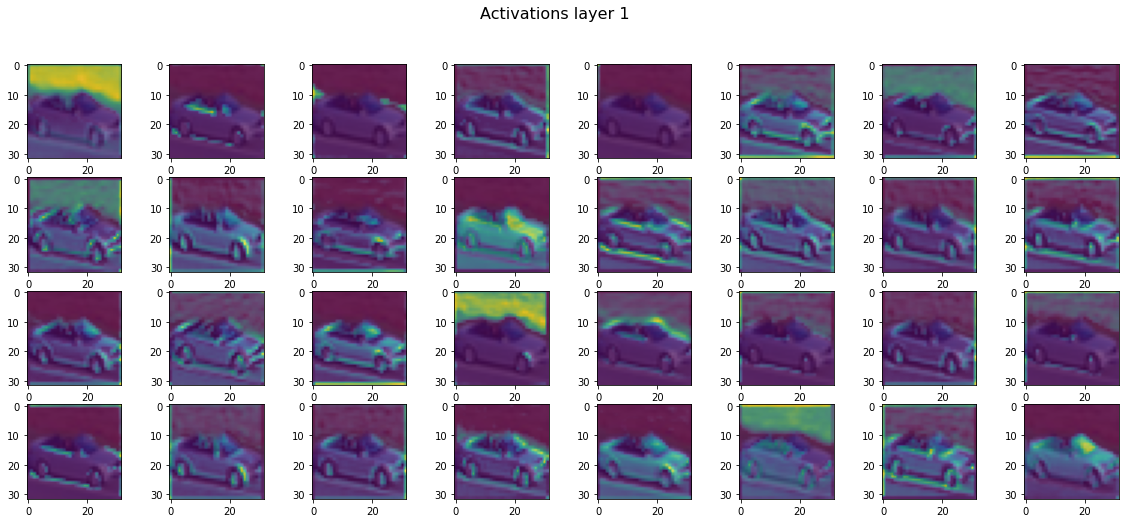

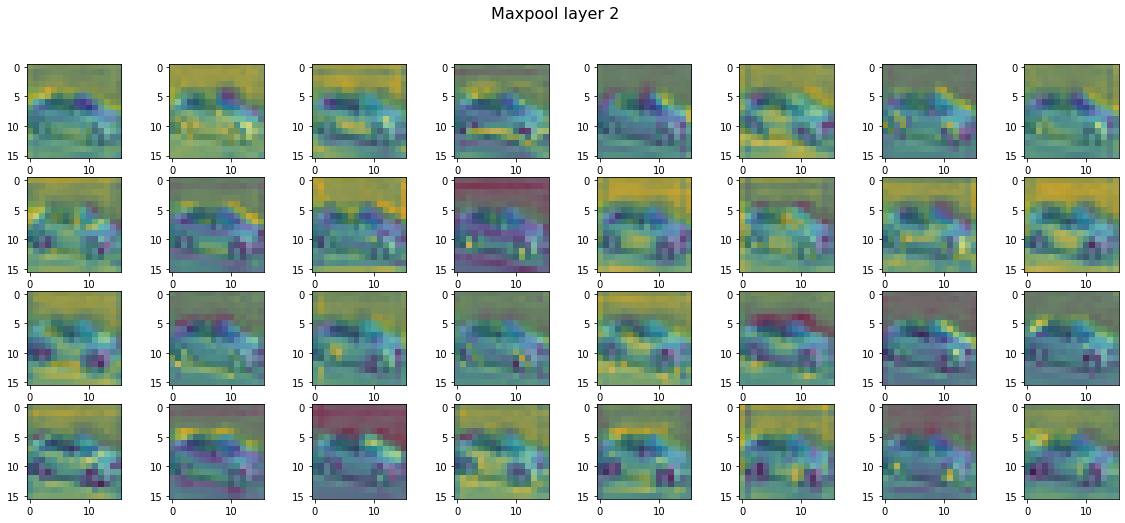

In [279]:
plot_feature_maps(img1)

Within the first layer there seem to be multiple neuron which are sensitive to uniform areas (background), some which are sensitive to horizontal edges or even to color.

We can nicely see that the relu activation function is used, as all values smaller than zero are also forced to zero and result in a much sparser feature map.

We observe the obvious resolution drop after the max pool layer. The activations are harder to interpret as they correspond to higher level features.

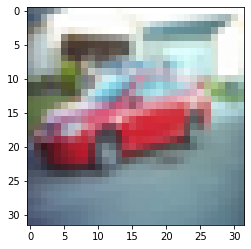

In [259]:
i = np.random.choice(range(50000))
img2 = X_train[i]
plt.imshow(img2)

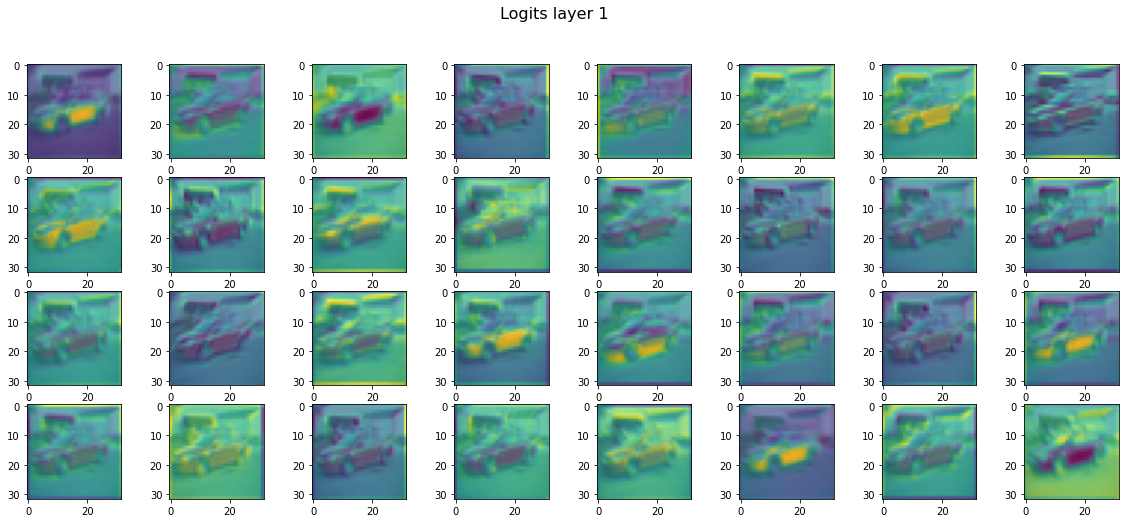

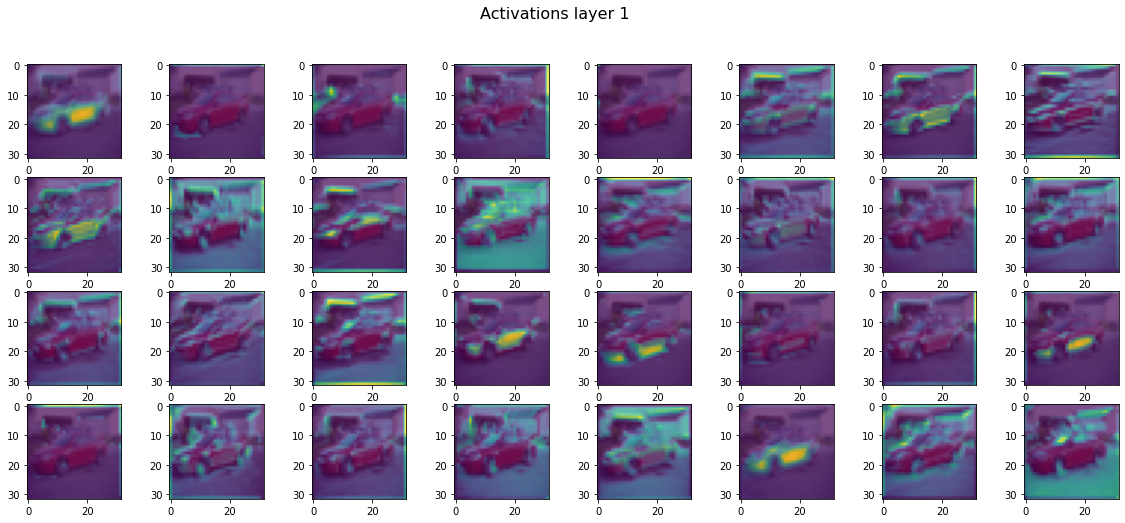

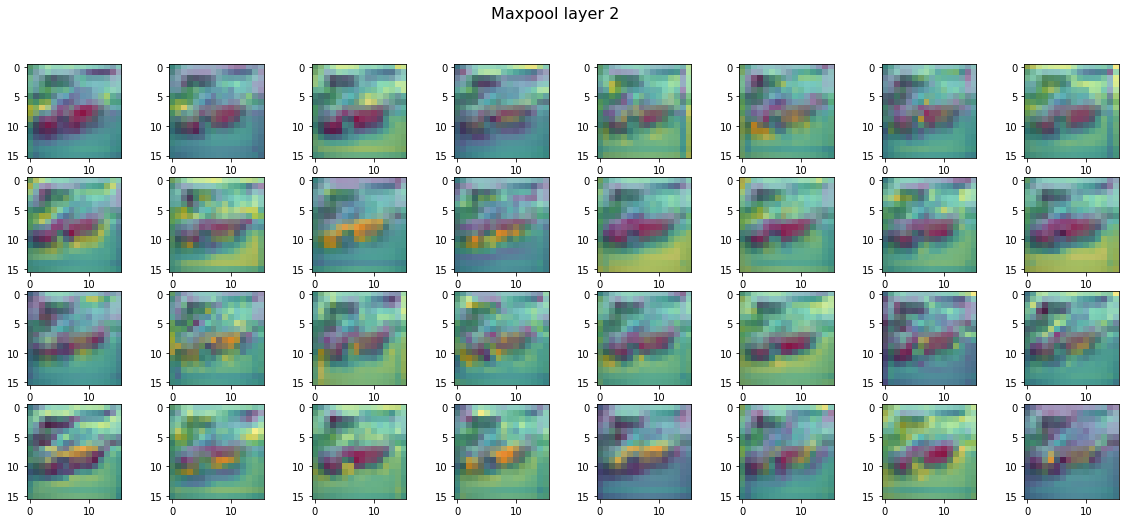

In [280]:
plot_feature_maps(img2)